In [1]:
import pandas as pd
import numpy as np

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")
from collections import Counter
from string import punctuation
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

In [3]:
df = pd.read_csv('../data/blog_data/example_vogue.csv')
df

,heading,author,datetime,below_title_summary,img,description,img2,description2
0,Kiara Advani’s smocked dress is all the rage i...,PRIYAM GOEL,SEP 16 2021,The ultimate blend of femininity and nonchalan...,https://media.vogue.in/wp-content/uploads/2021...,A smock sings femininity through and through. ...,https://media.vogue.in/wp-content/uploads/2021...,With monsoon being at its peak in Mumbai a rel...
1,Kiara Advani’s smocked dress is all the rage i...,PRIYAM GOEL,SEP 16 2021,The ultimate blend of femininity and nonchalan...,https://media.vogue.in/wp-content/uploads/2021...,A smock sings femininity through and through. ...,https://media.vogue.in/wp-content/uploads/2021...,With monsoon being at its peak in Mumbai a rel...


In [4]:
text= []
for index, row in df.iterrows():
    strin = row['heading'] + ' ' + row['author'] + ' ' + row['below_title_summary'] + ' ' + row['description'] + ' ' + row['description2']
    text += [strin,]
text

['Kiara Advani’s smocked dress is all the rage in sage PRIYAM GOEL The ultimate blend of femininity and nonchalance Kiara Advani’s maxi dress is proof that nothing beats a classic smock A smock sings femininity through and through. Infuse that in a broderie anglaise maxi and you’ve got yourself an eye-catching number. Kiara Advani is an expert at making fashion statements with her montage of relaxed uniforms and the actor did not disappoint with her recent choice of ensemble—she was spotted outside the office of Dharma Productions in a sage green maxi dress with a smocked bodice. Read to get the deets on her outfit. With monsoon being at its peak in Mumbai a relaxed breezy outfit aligns perfectly with the weather. If your aesthetic is unfussy eleganc a maxi dress like Advani’s would make a wonderful addition to your wardrobe. The actor’s dress with its smocked bodice balances sophistication and breeziness. What’s more her multi-tiered skirt with broderie anglaise detail adds a playful 

In [5]:
import nltk
result = []
for x in text:
    keywords = set(get_hotwords(x))
    words = set(nltk.corpus.words.words())
    f = lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words)
    res = set(map(f,keywords))
    res = [x for x in res if x and len(x)>1]
    print(len(res))
    result += [res,]

64
64


In [8]:
import nltk
words = set(nltk.corpus.words.words())

f = lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words)
res = set(map(f,keywords))
res = [x for x in res if x and len(x)>1]
print(len(res))
res

70


['peak',
 'soft',
 'space',
 'sage',
 'wardrobe',
 'proof',
 'element',
 'skirt',
 'fashion',
 'playful',
 'choice',
 'pop',
 'bag',
 'detail',
 'addition',
 'ensemble',
 'weather',
 'sophistication',
 'eye',
 'breezy',
 'colour',
 'tiered',
 'similar',
 'lightweight',
 'outfit',
 'blue',
 'number',
 'blend',
 'classic',
 'bodice',
 'hue',
 'office',
 'goel',
 'monsoon',
 'powder',
 'end',
 'time',
 'duty',
 'relaxed',
 'orange',
 'breeziness',
 'recent',
 'painful',
 'montage',
 'dharma',
 'romance',
 'wonderful',
 'dress',
 'breathing',
 'expert',
 'actor',
 'rage',
 'tote',
 'earthy',
 'anglaise',
 'bright',
 'touch',
 'romantic',
 'metallic',
 'nonchalance',
 'green',
 'smock',
 'aesthetic',
 'handle',
 'look',
 'summer',
 'unfussy',
 'ultimate',
 'here',
 'femininity']

In [7]:
from pytrends.request import TrendReq
import pandas as pd
import statsmodels.api as sm

pytrends = TrendReq(hl='en-US', tz=360)
datas = []

for res in result:
    data = pd.DataFrame()
    res = list(res)
    for x in range(0, 4):
        kw_list = [res[x],]
        pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='IN', gprop='')
        data[res[x]] = pytrends.interest_over_time()[res[x]]
    changes = []
    for word in data:
        inp = data[word]
        decomposition = sm.tsa.seasonal_decompose(inp, model='additive')
        mod = sm.tsa.statespace.SARIMAX(inp,
                                        order=(0, 0, 1),
                                        seasonal_order=(1, 1, 1, 12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        pred = results.get_prediction(start=pd.to_datetime('2019-10-20'), end=pd.to_datetime('2022-1-19'), dynamic=False)
        end = pred.predicted_mean['2021-09-26']
        start = pred.predicted_mean['2021-09-19']
        change_per = (end-start)/start*100
        print(change_per)
        changes += [change_per,]
    datas += [sorted(changes)[len(changes)-1],]
datas

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-6.258193983142586


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


1.8880841745994204


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-5.447626684649676


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


15.504143245843519


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-6.258193983142586


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


1.8880841745994204


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-5.447626684649676


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


15.504143245843519


[15.504143245843519, 15.504143245843519]

In [52]:
import statsmodels.api as sm
changes = []
for word in data:
    inp = data[word]
    decomposition = sm.tsa.seasonal_decompose(inp, model='additive')
    mod = sm.tsa.statespace.SARIMAX(inp,
                                    order=(0, 0, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    pred = results.get_prediction(start=pd.to_datetime('2019-10-20'), end=pd.to_datetime('2022-1-19'), dynamic=False)
    end = pred.predicted_mean['2021-09-26']
    start = pred.predicted_mean['2021-09-19']
    change_per = (end-start)/start*100
    print(change_per)
    changes += [change_per,]
    sorted(changes)[len(changes)-1]

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-9.665688183229973


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-2.6650743853275713


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


5.4066358874147635


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


1.8880841745994204


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


7.66265315038667


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-14.389034265050324


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-10.032406548934079


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-7.5117317077610215


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


-10.665822150536949


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


4.063199216414029


In [24]:
df = df.transpose()
df

,heading,author,datetime,below_title_summary,img,description,img2,description2
0,Kiara Advani’s smocked dress is all the rage i...,PRIYAM GOEL,SEP 16 2021,The ultimate blend of femininity and nonchalan...,https://media.vogue.in/wp-content/uploads/2021...,A smock sings femininity through and through. ...,https://media.vogue.in/wp-content/uploads/2021...,With monsoon being at its peak in Mumbai a rel...
1,Kiara Advani’s smocked dress is all the rage i...,PRIYAM GOEL,SEP 16 2021,The ultimate blend of femininity and nonchalan...,https://media.vogue.in/wp-content/uploads/2021...,A smock sings femininity through and through. ...,https://media.vogue.in/wp-content/uploads/2021...,With monsoon being at its peak in Mumbai a rel...


In [27]:
res_dct = {i: datas[i] for i in range(0, len(datas))}
res_dct = dict(sorted(res_dct.items(), key=lambda item: item[1]))
k = 0
pd_result = pd.DataFrame(columns=df.columns)
for key in res_dct:
    pd_result.loc[df.index[key]] = df.iloc[key]
pd_result

,heading,author,datetime,below_title_summary,img,description,img2,description2
0,Kiara Advani’s smocked dress is all the rage i...,PRIYAM GOEL,SEP 16 2021,The ultimate blend of femininity and nonchalan...,https://media.vogue.in/wp-content/uploads/2021...,A smock sings femininity through and through. ...,https://media.vogue.in/wp-content/uploads/2021...,With monsoon being at its peak in Mumbai a rel...
1,Kiara Advani’s smocked dress is all the rage i...,PRIYAM GOEL,SEP 16 2021,The ultimate blend of femininity and nonchalan...,https://media.vogue.in/wp-content/uploads/2021...,A smock sings femininity through and through. ...,https://media.vogue.in/wp-content/uploads/2021...,With monsoon being at its peak in Mumbai a rel...


In [56]:
sorted(changes)[len(changes)-1]

7.66265315038667

In [23]:
decomposition = sm.tsa.seasonal_decompose(peak, model='additive')
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(peak,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2702.2865400514884
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2329.0867054566943
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1827.033982554205


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1702.5589020247294
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1835.0316052673502


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1751.9853494001538
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1721.6227614376648


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1705.211243419919
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2401.6826553017827


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2118.7635032610006
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1754.8559636991579


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1615.8561174631618
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1770.3479055427867

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1674.0360871724934
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1645.9238538126247


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, s

ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1617.8338855171387
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1716.22739159878
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1636.438418268935
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1800.396355509555

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, s

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1591.5574321047209
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1642.8923712647863


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1638.4384128811494
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1661.8026412502286


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1593.5592260079918
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1674.0591869126954
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1600.1075190689098

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1770.140800352301


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1556.4696920030137
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1612.5777953025429


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1601.9144680109332
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1640.0835448231512


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1558.4671247462552
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1723.4769103969827


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provi

ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1643.9278432928486
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1744.678136057512


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1573.4087809749844
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1643.9540138251068


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1645.9100031715868
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1611.8421640447443


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1575.260519234249
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1682.7843019376683


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1608.303487584873
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1739.2853699710136


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1558.6912769735566


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1614.241625186994


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1618.249166436081
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1612.490832579444


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1560.6456832586482
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1690.6732967825922
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1614.350800548432

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1785.9286872646392


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1571.407365652473
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1614.4357305416306


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1616.0983119987627
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1641.5589806795956


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1573.3967745683456
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1657.604413478492


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1584.067750902857


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1734.5812904423278


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1538.1412043424948


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1590.2565234382978


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1586.0577073258196


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1607.4437896561612


C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1540.1408832146158


In [26]:
mod = sm.tsa.statespace.SARIMAX(peak,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\abhin\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5218      0.050     10.365      0.000       0.423       0.620
ar.S.L12       0.0028      0.016      0.172      0.864      -0.029       0.035
ma.S.L12      -0.5278      0.058     -9.148      0.000      -0.641      -0.415
sigma2        55.0002      3.049     18.038      0.000      49.024      60.976


In [47]:
pred = results.get_prediction(start=pd.to_datetime('2019-10-20'), end=pd.to_datetime('2022-1-19'), dynamic=False)
end = pred.predicted_mean['2021-09-26']
start = pred.predicted_mean['2021-09-19']
change_per = (end-start)/start*100
change_per

-9.665688183229973

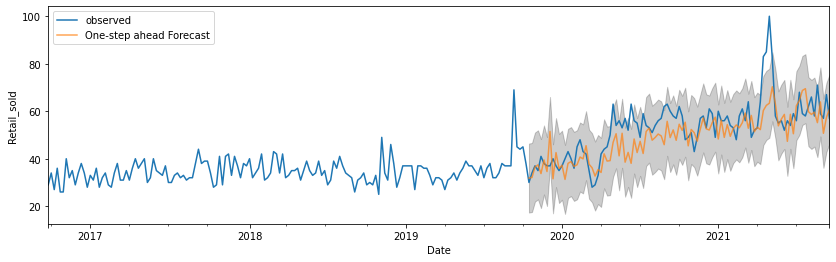

In [30]:
import matplotlib.pyplot as plt
pred_ci = pred.conf_int()
ax = peak['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = cas['2018-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 81.76
The Root Mean Squared Error is 9.04


In [18]:
y_forecasted = pred.predicted_mean
y_forecasted.tail(12)

2021-07-04    62.325046
2021-07-11    64.549923
2021-07-18    68.738658
2021-07-25    69.503988
2021-08-01    59.828319
2021-08-08    58.650586
2021-08-15    59.639763
2021-08-22    55.189651
2021-08-29    63.920648
2021-09-05    50.706180
2021-09-12    57.386760
2021-09-19    60.851686
Freq: W-SUN, dtype: float64

In [19]:
y_truth.head(12)

date
2018-06-03    33
2018-06-10    34
2018-06-17    39
2018-06-24    33
2018-07-01    35
2018-07-08    29
2018-07-15    31
2018-07-22    39
2018-07-29    36
2018-08-05    41
2018-08-12    37
2018-08-19    34
Name: peak, dtype: int32

In [30]:
pred_ci.head(24)

,lower choice,upper choice
2019-10-20,19.949467,36.106399
2019-10-27,18.626119,34.783051
2019-11-03,18.307955,34.464887
2019-11-10,20.003029,36.159961
2019-11-17,22.510147,38.667079
2019-11-24,21.398665,37.555597
2019-12-01,21.354619,37.511551
2019-12-08,28.634961,44.791893
2019-12-15,21.692431,37.849363
2019-12-22,21.175029,37.331961


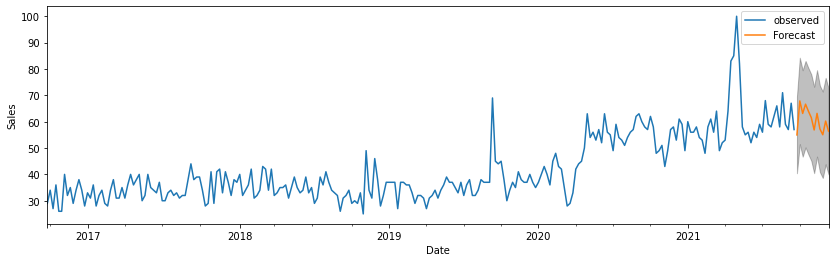

In [20]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = cas.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [21]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2021-09-26    54.969952
2021-10-03    67.879064
2021-10-10    63.117760
2021-10-17    66.637070
2021-10-24    63.966153
2021-10-31    61.545017
2021-11-07    56.849884
2021-11-14    63.148271
2021-11-21    57.262671
2021-11-28    55.035867
2021-12-05    60.228831
2021-12-12    56.380023
Freq: W-SUN, dtype: float64